# Task 2: <font color =Green> *Classification model*</font> to classify the data based on the cost of construction of the dugwells.

In [13]:
# importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Setting path locations and other initializations for <font color =red> *Aggregation*<font>

In [14]:
# identifier for aggregating the data as per the requirement 

level = 'State'
# enter 'State' 'District' 'Block/Tehsil' or 'Village' in level as per the requirement

In [15]:
# setting path for the relevant locations

current_dir = os.getcwd()                      # current working directory
parent_dir = os.path.dirname(current_dir)      # parent directory
data_set = parent_dir+'/data'                  # setting the path for data directory
plots = parent_dir+'/plots'                     # setting the path for plot directory

In [16]:
# used datasets

no_of_dugwells = data_set + '/mi_census5_13-14_Table1.1 (1).csv'     # number of dugwells at each level containing 'Pucca' 'Kutcha' 'Dug-cum bore well' and 'Others' 
owner_caste = data_set + '/mi_census5_13-14_Table.1.3.csv'           # caste aggregated owners of dugwells at each level containing 'No. of Dugwells owned by - Scheduled Caste','No. of Dugwells owned by - Scheduled tribe','No. of Dugwells owned by - OBC','No. of Dugwells owned by - Others','No. of Dugwells Owned by - other than individual farmer (incl. Public & Group of farmers)'
average_cost = data_set + '/mi_census5_13-14_Table.1.5 (1).csv'      # average cost of dugwell at each level containing 'Number' , 'Cost' and 'Average'
dugwell_depth = data_set + '/mi_census5_13-14_Table1.17.csv'         # average dugwell depth at each level 
pumping_hrs = data_set + '/mi_census5_13-14_Table1.16.csv'           # average number of pumping hours per day at each level
fund_govt = data_set + '/mi_census5_13-14_Table1.7.csv'              # proportion of the dugwells funded by the government at each level

## Data for number of dugwells at each level - <font color=blue> *dugwell_number*</font>

In [17]:
# no of wells get aggreagated based on the value set in level identifier declared in BLOCK 2

data_1 = pd.read_csv(no_of_dugwells)
dugwell_number = data_1.groupby(level)['Pucca','Kutcha','Dug-cum bore well','Others'].sum()

dugwell_number

,Pucca,Kutcha,Dug-cum bore well,Others
State,,,,
ANDAMAN & NICOBARS,882,434,0,18
ANDHRA PRADESH,123979,70264,15279,2508
ARUNACHAL PRADESH,3,17,1,0
ASSAM,13,35,3,164
BIHAR,8757,3284,9500,1336
CHHATISGARH,16319,1536,27929,1827
GOA,3891,766,7,9
GUJARAT,865526,39417,26346,978
HARYANA,14,0,5,9


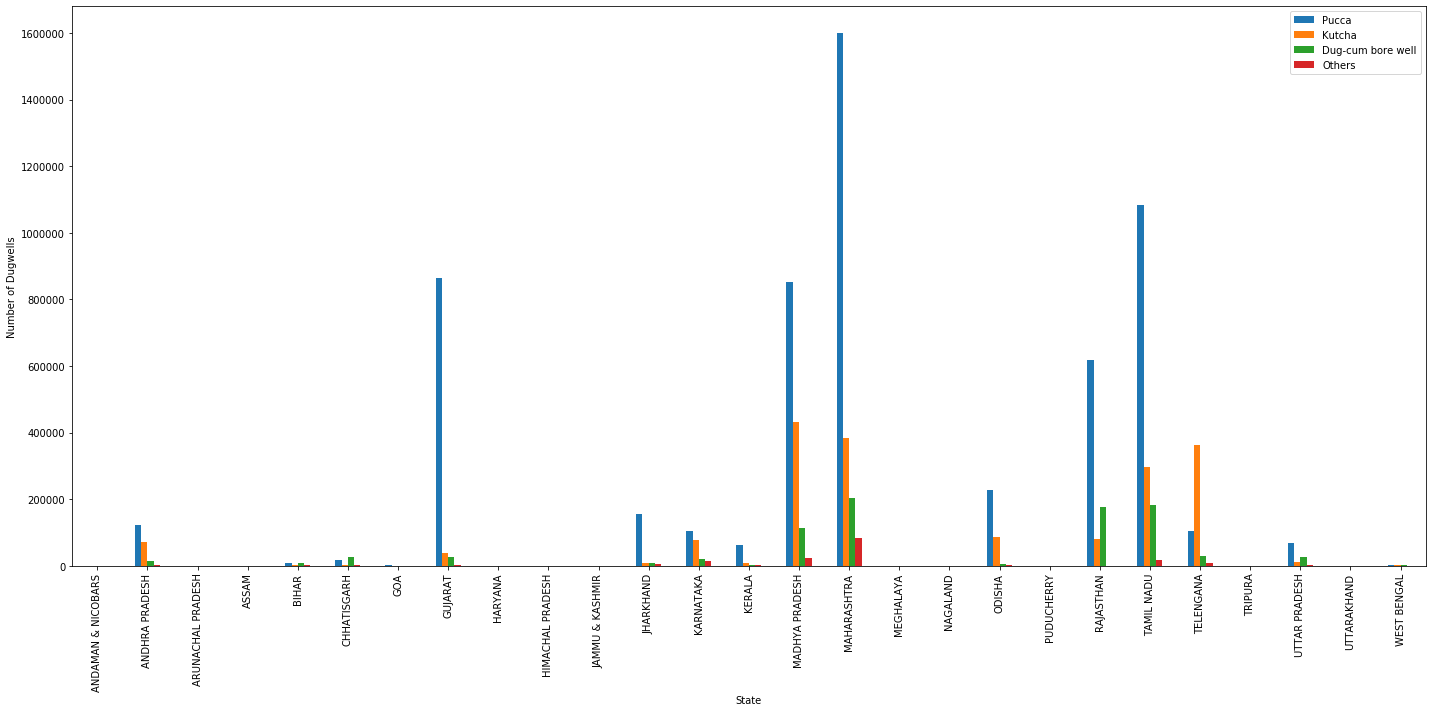

In [18]:
%matplotlib inline                           
# comment above line in case plot is not reuired within the notebook

# plotting the graph for the number of dugwells at each level

plt.rcParams['figure.figsize'] = (20,10)     # plotted graph dimensions can be changed from here
ax = dugwell_number.plot.bar(rot=90)
plt.ylabel('Number of Dugwells')

# saving the plotted graph in plot directory
plt.tight_layout()
name = '/dugwell_no_'+level+'.png'
plt.savefig(plots + name, dpi=100) 

## Data for average cost of dugwells at each level - <font color=blue>*dugwell_cost*</font>

In [19]:
# reading the cost of dugwell based on the value set in level identifier declared in BLOCK 2

data_3 = pd.read_csv(average_cost)
dataf = data_3.groupby(level)['Number and Cost of Construction Over The Years - Up to 2006-07 - No.','Number and Cost of Construction Over The Years - Up to 2006-07 - Cost','Number and Cost of Construction Over The Years - During 2007-08 - No.','Number and Cost of Construction Over The Years - During 2007-08 - Cost','Number and Cost of Construction Over The Years - During 2008-09 - No.','Number and Cost of Construction Over The Years - During 2008-09 - Cost','Number and Cost of Construction Over The Years - During 2009-10 - No.','Number and Cost of Construction Over The Years - During 2009-10 - Cost','Number and Cost of Construction Over The Years - During 2010-11 - No.','Number and Cost of Construction Over The Years - During 2010-11 - Cost','Number and Cost of Construction Over The Years - During 2011-12 - No.','Number and Cost of Construction Over The Years - During 2011-12 - Cost','Number and Cost of Construction Over The Years - During 2012-13 - No.','Number and Cost of Construction Over The Years - During 2012-13 - Cost','Number and Cost of Construction Over The Years - During 2013-14 - No.','Number and Cost of Construction Over The Years - During 2013-14 - Cost'].sum()

# calculating the average cost of dugwell at each level

dataf['Number'] = dataf['Number and Cost of Construction Over The Years - During 2013-14 - No.'] + dataf['Number and Cost of Construction Over The Years - During 2012-13 - No.'] + dataf['Number and Cost of Construction Over The Years - During 2011-12 - No.'] + dataf['Number and Cost of Construction Over The Years - During 2010-11 - No.'] + dataf['Number and Cost of Construction Over The Years - During 2009-10 - No.']+dataf['Number and Cost of Construction Over The Years - During 2008-09 - No.'] + dataf['Number and Cost of Construction Over The Years - During 2007-08 - No.'] + dataf['Number and Cost of Construction Over The Years - Up to 2006-07 - No.']
dataf['Cost'] = dataf['Number and Cost of Construction Over The Years - During 2013-14 - Cost'] + dataf['Number and Cost of Construction Over The Years - During 2012-13 - Cost'] + dataf['Number and Cost of Construction Over The Years - During 2011-12 - Cost'] + dataf['Number and Cost of Construction Over The Years - During 2010-11 - Cost'] + dataf['Number and Cost of Construction Over The Years - During 2009-10 - Cost']+dataf['Number and Cost of Construction Over The Years - During 2008-09 - Cost'] + dataf['Number and Cost of Construction Over The Years - During 2007-08 - Cost'] + dataf['Number and Cost of Construction Over The Years - Up to 2006-07 - Cost']
dataf['Average'] = (dataf['Cost']/dataf['Number'])

# creating a new dataframe with attributes containing the values number, cost and average cost of dugwells
dugwell_cost = dataf[['Number','Cost','Average']].copy()
data3 = dataf[['Average']].copy()
dugwell_cost

,Number,Cost,Average
State,,,
ANDAMAN & NICOBARS,1334,153967,115.417541
ANDHRA PRADESH,212030,5389779,25.419889
ARUNACHAL PRADESH,21,38487,1832.714286
ASSAM,215,69963,325.409302
BIHAR,22877,939043,41.047471
CHHATISGARH,47611,2520993,52.949802
GOA,4673,144647,30.953777
GUJARAT,932267,153139654,164.265874
HARYANA,28,4645,165.892857


## Dugwell Average Cost <font color=red> *Normalization* </font>

In [20]:
max_depth = dugwell_cost['Average'].max()
min_depth = dugwell_cost['Average'].min()
diff = max_depth - min_depth

In [21]:
dugwell_cost['Average'] = (dugwell_cost['Average']-min_depth)/diff

In [22]:
dugwell_cost

,Number,Cost,Average
State,,,
ANDAMAN & NICOBARS,1334,153967,0.049797
ANDHRA PRADESH,212030,5389779,0.000000
ARUNACHAL PRADESH,21,38487,1.000000
ASSAM,215,69963,0.165988
BIHAR,22877,939043,0.008647
CHHATISGARH,47611,2520993,0.015233
GOA,4673,144647,0.003062
GUJARAT,932267,153139654,0.076825
HARYANA,28,4645,0.077726


In [104]:
# dugwell_cost.to_csv('Dummy.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

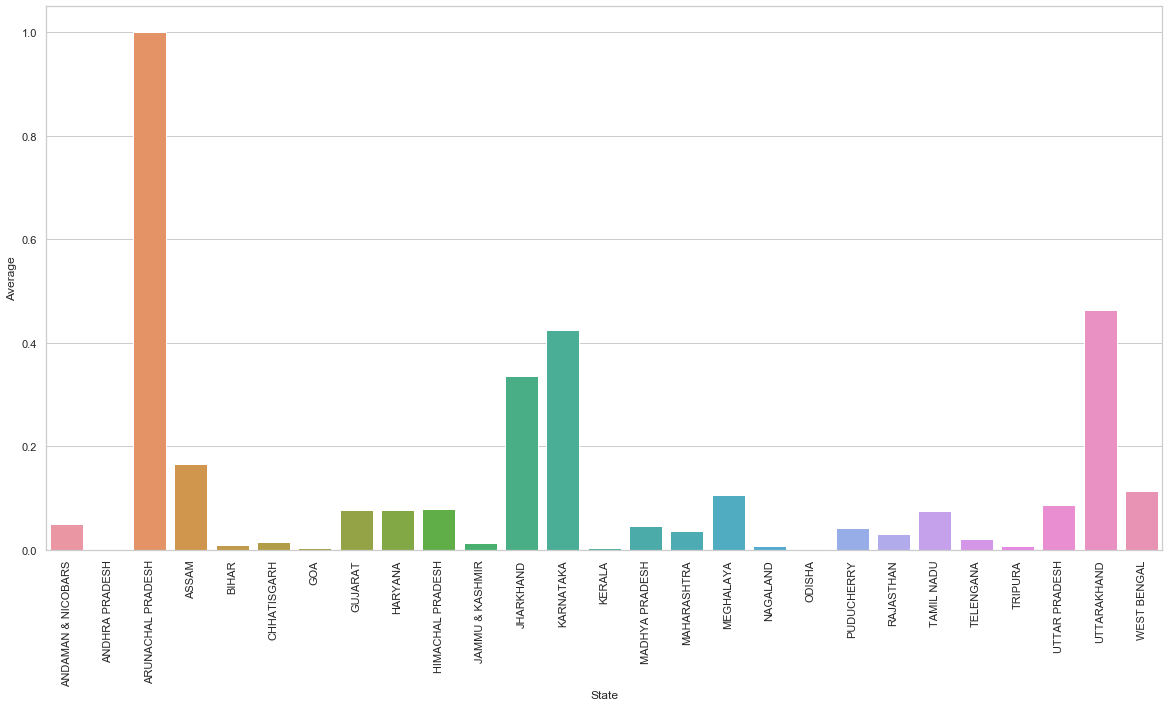

In [24]:
# plotting the average cost of dugwell at each level

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(dugwell_cost.index, y="Average", data=dugwell_cost)
plt.xticks(rotation=90)

## <font color = red>Box Plot</font> for cost of dugwells

In [25]:
data3['Average'] = dugwell_cost['Average']

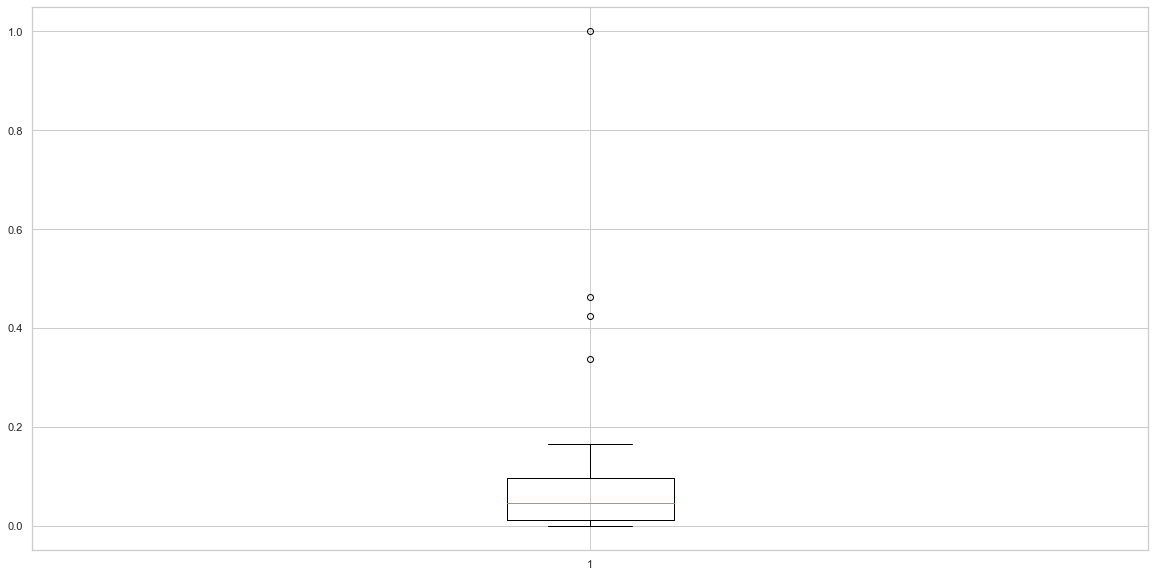

In [26]:
#finding the outliers by plotting the box plot for average cost of dugwells at each level
plt.boxplot(dugwell_cost['Average'])

#saving the box plot in plot directory
name = '/boxplot_'+level+'.png'
plt.savefig(plots+name)

plt.show()

## <font color=red>Outlier</font> Removal

In [27]:
# median of the average cost values
data3.median()

Average    0.045889
dtype: float64

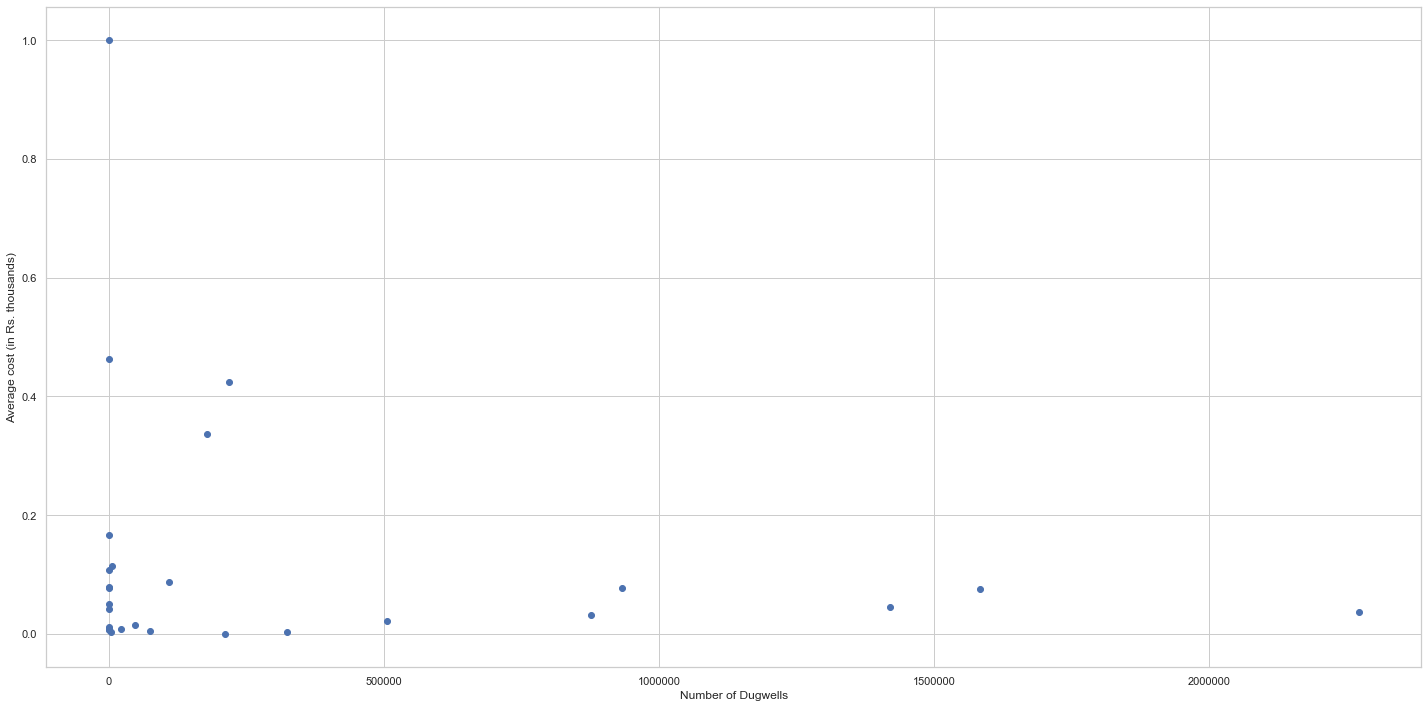

In [28]:
# scatter plot for the visualization of the outliers

plt.scatter(dugwell_cost['Number'],dugwell_cost['Average'])
plt.xlabel('Number of Dugwells')
plt.ylabel('Average cost (in Rs. thousands)')

# saving the scatter plot in plot directory

plt.tight_layout()
name = '/scatter_averagecost_'+level+'.png'
plt.savefig(plots+name)

In [29]:
# calculating interquartile range 

v25 = np.percentile(data3,25)
v75 = np.percentile(data3,75)
iqr = v75-v25
iqr

0.08650810478096287

In [30]:
mval = v75+1.5*iqr
mval

0.22688100048080379

In [31]:
#removing the outliers from the dataset

data4 = dugwell_cost[dugwell_cost.Average <= mval]
data4

,Number,Cost,Average
State,,,
ANDAMAN & NICOBARS,1334,153967,0.049797
ANDHRA PRADESH,212030,5389779,0.000000
ASSAM,215,69963,0.165988
BIHAR,22877,939043,0.008647
CHHATISGARH,47611,2520993,0.015233
GOA,4673,144647,0.003062
GUJARAT,932267,153139654,0.076825
HARYANA,28,4645,0.077726
HIMACHAL PRADESH,664,111607,0.078937


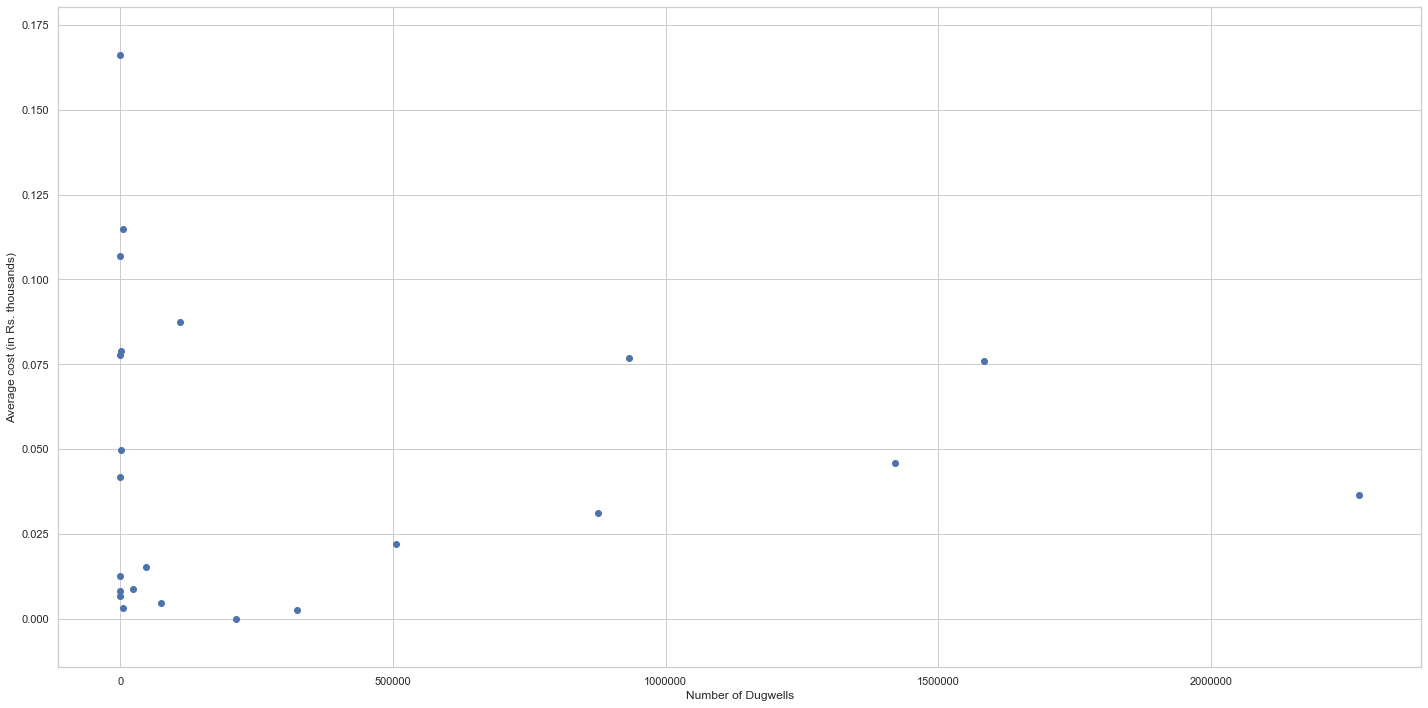

In [32]:
# scatter plot after removal of outliers

plt.scatter(data4['Number'],data4['Average'])
plt.xlabel('Number of Dugwells')
plt.ylabel('Average cost (in Rs. thousands)')

# saving the plotted graph in plot directory
plt.tight_layout()
name = '/scatter_after_outlier_'+level+'.png'
plt.savefig(plots+name)

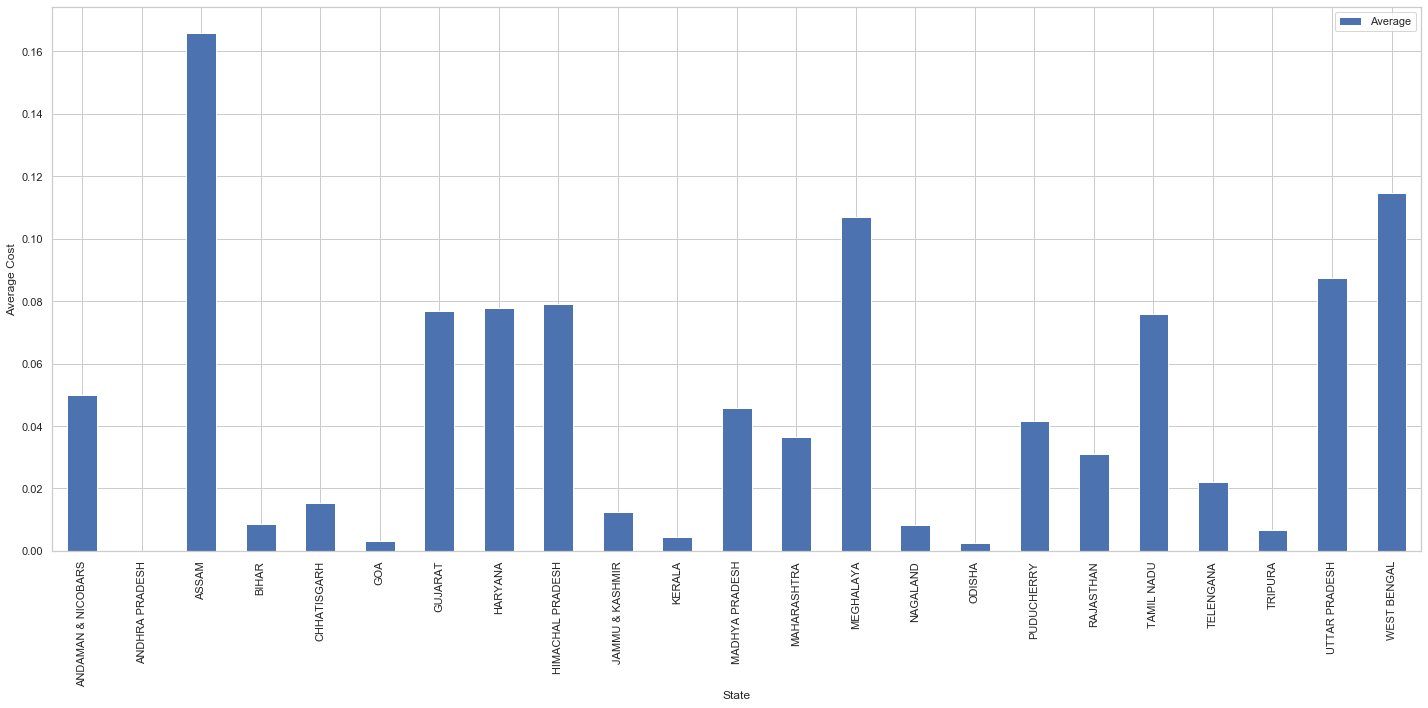

In [33]:
# average cost plot after removal of outliers 

data5 = data3[data3.Average <= mval]
plt.rcParams['figure.figsize'] = (20,10)
ax = data5.plot.bar(rot=90)
plt.ylabel('Average Cost')

# saving the plotted graph in plot directory
plt.tight_layout()
name = '/average_cost_outlier_'+level+'.png'
plt.savefig(plots+name)

## <font color=green>*Discreatization* </font>of dugwell cost into <font color = red>HIGH,</font> MEDIUM, <font color=blue>LOW </font>cost

In [34]:
# low cost

vl_low = np.percentile(data5,30)
vl_low
data6 = data5[data5.Average<=vl_low]

In [35]:
# high and average cost

vl_high = np.percentile(data5,70)
vl_high
data7 = data5[data5.Average>=vl_high]

C:\Users\Pratik Bangar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Pratik Bangar\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


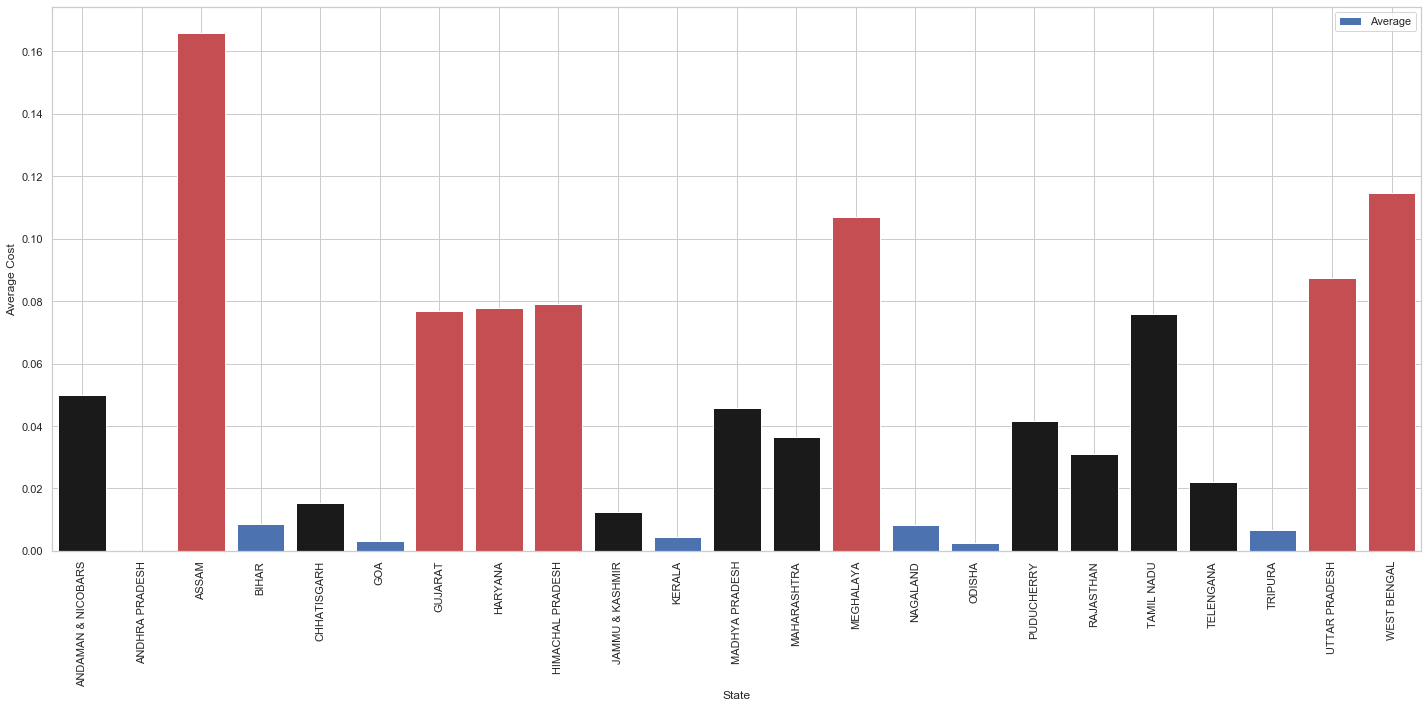

In [36]:
# plotting the bar graph depicting the HIGH MEDIUM and LOW cost

data8 = data5
ax = data5.plot.bar(rot=90)

#assigning colors red for HIGH, black for MEDIUM and BLUE for LOW
data8['colors'] = 'k'
data8.loc[data8.Average>=vl_high,'colors'] = 'r'
data8.loc[data8.Average<=vl_low,'colors'] = 'b'
plt.bar(data8.index, data8.Average, color=data8.colors)
plt.ylabel('Average Cost')

import warnings
warnings.filterwarnings('ignore')

# saving the plotted graph in plot directory
plt.tight_layout()

name = '/averagecost_classification_'+level+'.png'
plt.savefig(plots+name)

## Data for average depth of dugwells at each level - <font color=blue>*depth_dugwell*</font>

In [37]:
# reading the depth of dugwell based on the value set in level identifier declared in BLOCK 2

data_1 = pd.read_csv(dugwell_depth)
dataf = data_1.groupby(level)['No. by the depth of dugwell - 0 to 20 mts','No. by the depth of dugwell - 20 to 40 mts','No. by the depth of dugwell - 40 to 60 mts','No. by the depth of dugwell - 60 to 70 mts','No. by the depth of dugwell - >70 mts'].sum()

#calculating the average depth of dugwells
dataf['Depth'] = (10*dataf['No. by the depth of dugwell - 0 to 20 mts']+30*dataf['No. by the depth of dugwell - 20 to 40 mts']+50*dataf['No. by the depth of dugwell - 40 to 60 mts']+65*dataf['No. by the depth of dugwell - 60 to 70 mts']+80*dataf['No. by the depth of dugwell - >70 mts'])
dataf['Depth'] = dataf['Depth']/(dataf['No. by the depth of dugwell - 0 to 20 mts']+dataf['No. by the depth of dugwell - 20 to 40 mts']+dataf['No. by the depth of dugwell - 40 to 60 mts']+dataf['No. by the depth of dugwell - 60 to 70 mts']+dataf['No. by the depth of dugwell - >70 mts'])
depth_dugwell = dataf
depth_dugwell

,No. by the depth of dugwell - 0 to 20 mts,No. by the depth of dugwell - 20 to 40 mts,No. by the depth of dugwell - 40 to 60 mts,No. by the depth of dugwell - 60 to 70 mts,No. by the depth of dugwell - >70 mts,Depth
State,,,,,,
ANDAMAN & NICOBARS,1301,25,2,5,1,10.693403
ANDHRA PRADESH,180943,20387,4401,1136,5163,14.752488
ARUNACHAL PRADESH,20,0,0,0,1,13.333333
ASSAM,15,149,0,0,51,40.465116
BIHAR,18987,2448,545,173,724,15.724308
CHHATISGARH,42746,2717,405,270,1473,13.959169
GOA,4669,3,0,0,1,10.027819
GUJARAT,852097,78243,1115,165,647,11.784709
HARYANA,17,3,1,1,6,30.535714


In [38]:
#creating a new dataframe containing NUMBER AVERAGE COST and DEPTH at each level

# data4.drop('Cost', axis=1, inplace=True)
data4['Depth'] = depth_dugwell['Depth'].astype(float)
data4

,Number,Cost,Average,Depth
State,,,,
ANDAMAN & NICOBARS,1334,153967,0.049797,10.693403
ANDHRA PRADESH,212030,5389779,0.000000,14.752488
ASSAM,215,69963,0.165988,40.465116
BIHAR,22877,939043,0.008647,15.724308
CHHATISGARH,47611,2520993,0.015233,13.959169
GOA,4673,144647,0.003062,10.027819
GUJARAT,932267,153139654,0.076825,11.784709
HARYANA,28,4645,0.077726,30.535714
HIMACHAL PRADESH,664,111607,0.078937,19.299699


## Dugwell Depth <font color=red> *Normalization* </font>

In [39]:
max_depth = data4['Depth'].max()
min_depth = data4['Depth'].min()
diff = max_depth - min_depth
data4['Depth'] = (data4['Depth']-min_depth)/diff

In [40]:
data4['color'] = data8['colors']

In [41]:
data4

,Number,Cost,Average,Depth,color
State,,,,,
ANDAMAN & NICOBARS,1334,153967,0.049797,0.013882,k
ANDHRA PRADESH,212030,5389779,0.000000,0.095147,b
ASSAM,215,69963,0.165988,0.609923,r
BIHAR,22877,939043,0.008647,0.114603,b
CHHATISGARH,47611,2520993,0.015233,0.079264,k
GOA,4673,144647,0.003062,0.000557,b
GUJARAT,932267,153139654,0.076825,0.035731,r
HARYANA,28,4645,0.077726,0.411132,r
HIMACHAL PRADESH,664,111607,0.078937,0.186183,r


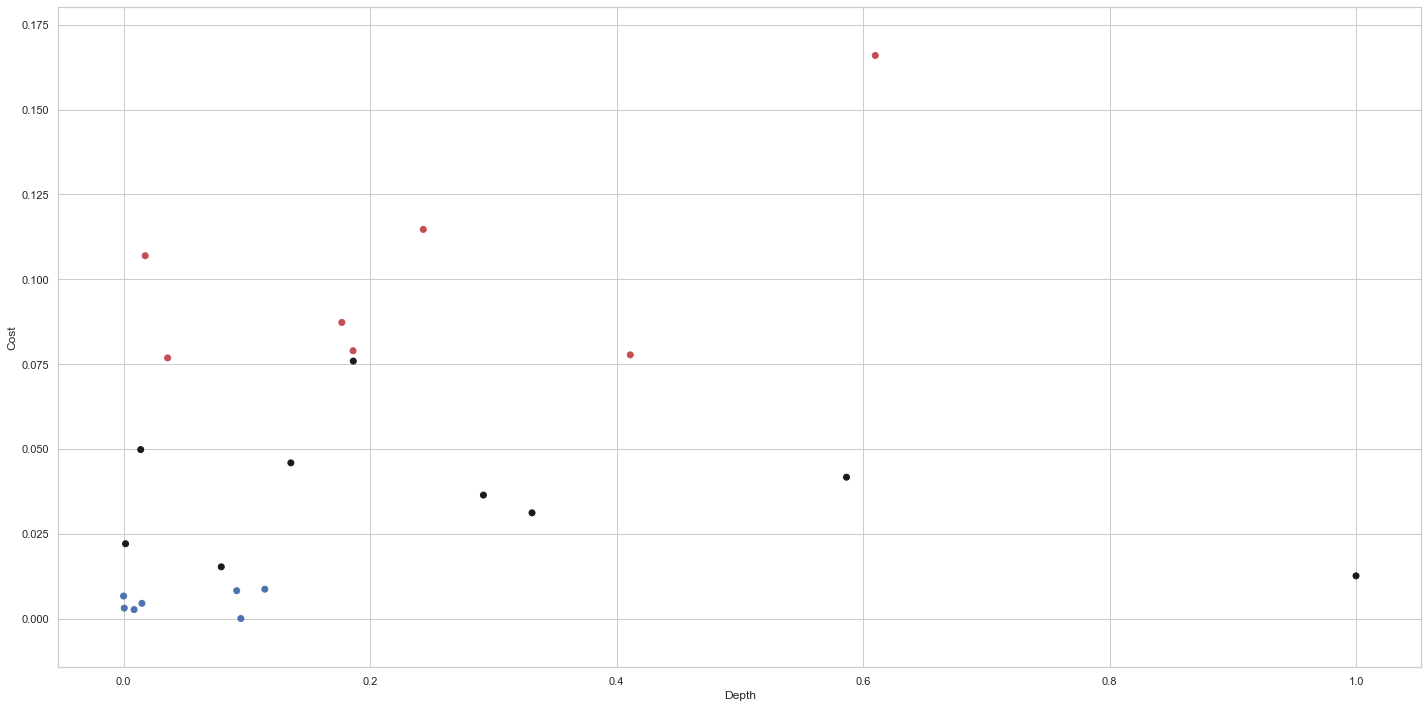

In [42]:
#scatter plot for the depth of dugwells at each level

plt.scatter(data4['Depth'],data4['Average'],color=data8['colors'])
plt.ylabel('Cost')
plt.xlabel('Depth')
# saving the plotted graph in plot directory

plt.tight_layout()
name = '/scatter_depth_'+level+'.png'
plt.savefig(plots+name)

## Data for average pumping hours of dugwells at each level - <font color=blue>*hrs_pump*</font>

In [43]:
# reading the pumping hours of dugwell based on the value set in level identifier declared in BLOCK 2

data_1 = pd.read_csv(pumping_hrs)
dataf = data_1.groupby(level)['During Kharif season - 0-4 hrs','During Kharif season - 4-8 hrs','During Kharif season - 8-12 hrs','During Kharif season - 12-16 hrs','During Kharif season - 16-20 hrs','During Kharif season - 20-24 hrs'].sum()

#calculating the average pumping hours

dataf['Pumping Hours'] = 2*dataf['During Kharif season - 0-4 hrs'] + 6*dataf['During Kharif season - 4-8 hrs'] + 10*dataf['During Kharif season - 8-12 hrs']+14*dataf['During Kharif season - 12-16 hrs']+18*dataf['During Kharif season - 16-20 hrs']+22*dataf['During Kharif season - 20-24 hrs']
dataf['Pumping Hours'] = dataf['Pumping Hours'] / (dataf['During Kharif season - 0-4 hrs'] + dataf['During Kharif season - 4-8 hrs'] + dataf['During Kharif season - 8-12 hrs']+dataf['During Kharif season - 12-16 hrs']+dataf['During Kharif season - 16-20 hrs']+dataf['During Kharif season - 20-24 hrs'])
hrs_pump = dataf
hrs_pump

,During Kharif season - 0-4 hrs,During Kharif season - 4-8 hrs,During Kharif season - 8-12 hrs,During Kharif season - 12-16 hrs,During Kharif season - 16-20 hrs,During Kharif season - 20-24 hrs,Pumping Hours
State,,,,,,,
ANDAMAN & NICOBARS,754,5,1,0,0,0,2.036842
ANDHRA PRADESH,79082,68623,1684,49,10,136,3.948283
ARUNACHAL PRADESH,7,7,2,1,0,0,5.294118
ASSAM,156,51,5,0,0,0,3.150943
BIHAR,5774,7177,6725,2413,200,449,7.437769
CHHATISGARH,31973,4506,1617,4243,107,1963,4.766286
GOA,3556,0,0,0,0,0,2.000000
GUJARAT,629355,287194,10154,298,33,66,3.332577
HARYANA,5,14,8,1,0,0,6.714286


In [44]:
# merging the pumping hrs with the main dataset
data4['Pumping Hours'] = hrs_pump['Pumping Hours'].astype(float)
data4

,Number,Cost,Average,Depth,color,Pumping Hours
State,,,,,,
ANDAMAN & NICOBARS,1334,153967,0.049797,0.013882,k,2.036842
ANDHRA PRADESH,212030,5389779,0.000000,0.095147,b,3.948283
ASSAM,215,69963,0.165988,0.609923,r,3.150943
BIHAR,22877,939043,0.008647,0.114603,b,7.437769
CHHATISGARH,47611,2520993,0.015233,0.079264,k,4.766286
GOA,4673,144647,0.003062,0.000557,b,2.000000
GUJARAT,932267,153139654,0.076825,0.035731,r,3.332577
HARYANA,28,4645,0.077726,0.411132,r,6.714286
HIMACHAL PRADESH,664,111607,0.078937,0.186183,r,6.795953


## Dugwell Pumping Hours <font color=red> *Normalization* </font>

In [45]:
max_depth = data4['Pumping Hours'].max()
min_depth = data4['Pumping Hours'].min()
diff = max_depth - min_depth
data4['Pumping Hours'] = (data4['Pumping Hours']-min_depth)/diff

In [46]:
data4

,Number,Cost,Average,Depth,color,Pumping Hours
State,,,,,,
ANDAMAN & NICOBARS,1334,153967,0.049797,0.013882,k,0.006775
ANDHRA PRADESH,212030,5389779,0.000000,0.095147,b,0.358287
ASSAM,215,69963,0.165988,0.609923,r,0.211657
BIHAR,22877,939043,0.008647,0.114603,b,1.000000
CHHATISGARH,47611,2520993,0.015233,0.079264,k,0.508717
GOA,4673,144647,0.003062,0.000557,b,0.000000
GUJARAT,932267,153139654,0.076825,0.035731,r,0.245059
HARYANA,28,4645,0.077726,0.411132,r,0.866952
HIMACHAL PRADESH,664,111607,0.078937,0.186183,r,0.881971


In [47]:
# reading the data for the number of dugwells in each source of funding at each level

data_1 = pd.read_csv(fund_govt)
dataf = data_1.groupby(level)['With one source of Finance - Bank loan','With one source of Finance - Govt. Fund','With one source of Finance - Own Saving','With one source of Finance - Money Lender','With one source of Finance - Others','With two Sources of finance - Own Saving & Bank Loan','With two Sources of finance - Own Saving & Govt Fund','With two Sources of finance - Own Saving & Money Lender','With two Sources of finance - Bank Loan & Govt Fund','With two Sources of finance - Bank Loan & Money Lender','With two Sources of finance - Govt Fund & Money Lender','With two Sources of finance - Others'].sum()

#calculating the proportion of the dugwells funded by the government at each level
dataf.columns = ['Bank loan','Govt Fund','Own Saving','Money Lender','One Source','Own Saving & Bank Loan','Own Saving & Govt Fund','Own Saving & Money Lender','Bank Loan & Govt Fund','Bank Loan & Money Lender','Govt Fund & Money Lender','Two Source']
dataf

,Bank loan,Govt Fund,Own Saving,Money Lender,One Source,Own Saving & Bank Loan,Own Saving & Govt Fund,Own Saving & Money Lender,Bank Loan & Govt Fund,Bank Loan & Money Lender,Govt Fund & Money Lender,Two Source
State,,,,,,,,,,,,
ANDAMAN & NICOBARS,14,277,529,0,5,0,14,0,0,0,0,1
ANDHRA PRADESH,1220,2070,114979,1450,567,6523,1921,30464,506,125,133,36128
ASSAM,0,0,90,0,0,0,0,2,0,0,0,37
BIHAR,1448,223,2463,6,40,504,447,523,1712,79,18,11417
CHHATISGARH,616,1987,27428,7,598,4813,260,12,407,71,1,10161
GOA,178,167,3427,12,453,6,13,0,1,0,0,10
GUJARAT,48409,14144,359056,4064,485029,51,12,2,529,44,2,10625
HARYANA,0,0,0,0,0,0,0,0,0,0,0,9
HIMACHAL PRADESH,24,12,227,0,19,52,31,0,12,1,0,121


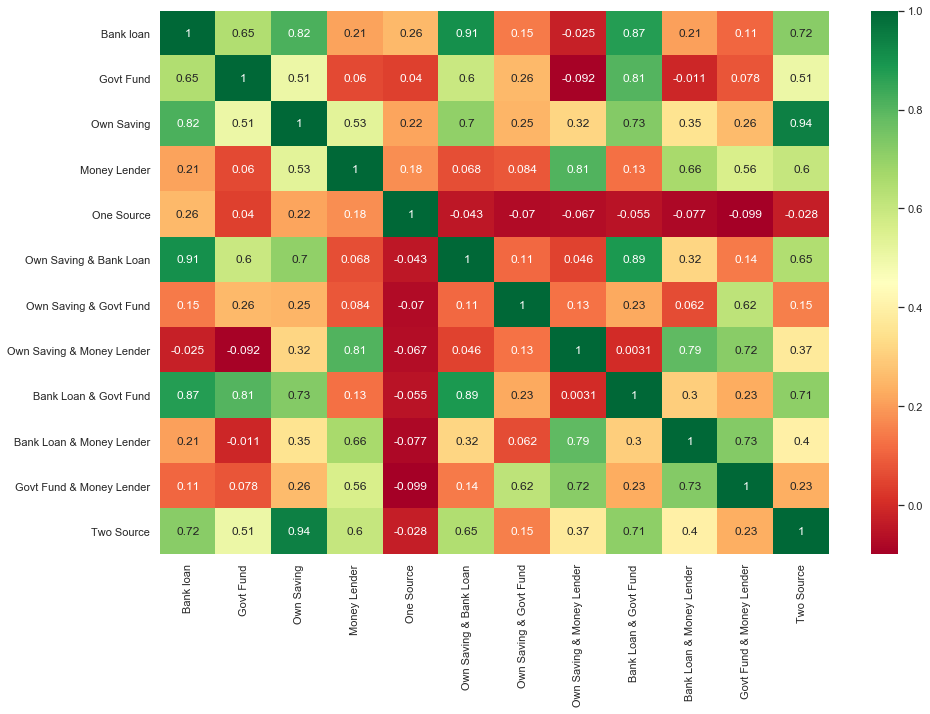

In [49]:
corr = dataf.corr()
top_corr_features = corr.index
plt.figure(figsize=(15,10))
# plot heat map
g=sns.heatmap(dataf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# saving the plotted graph in plot directory
name = '/funding_correlation.png'
plt.savefig(plots+name)

In [50]:
dataf = dataf.drop(['Own Saving & Money Lender'],axis = 1)

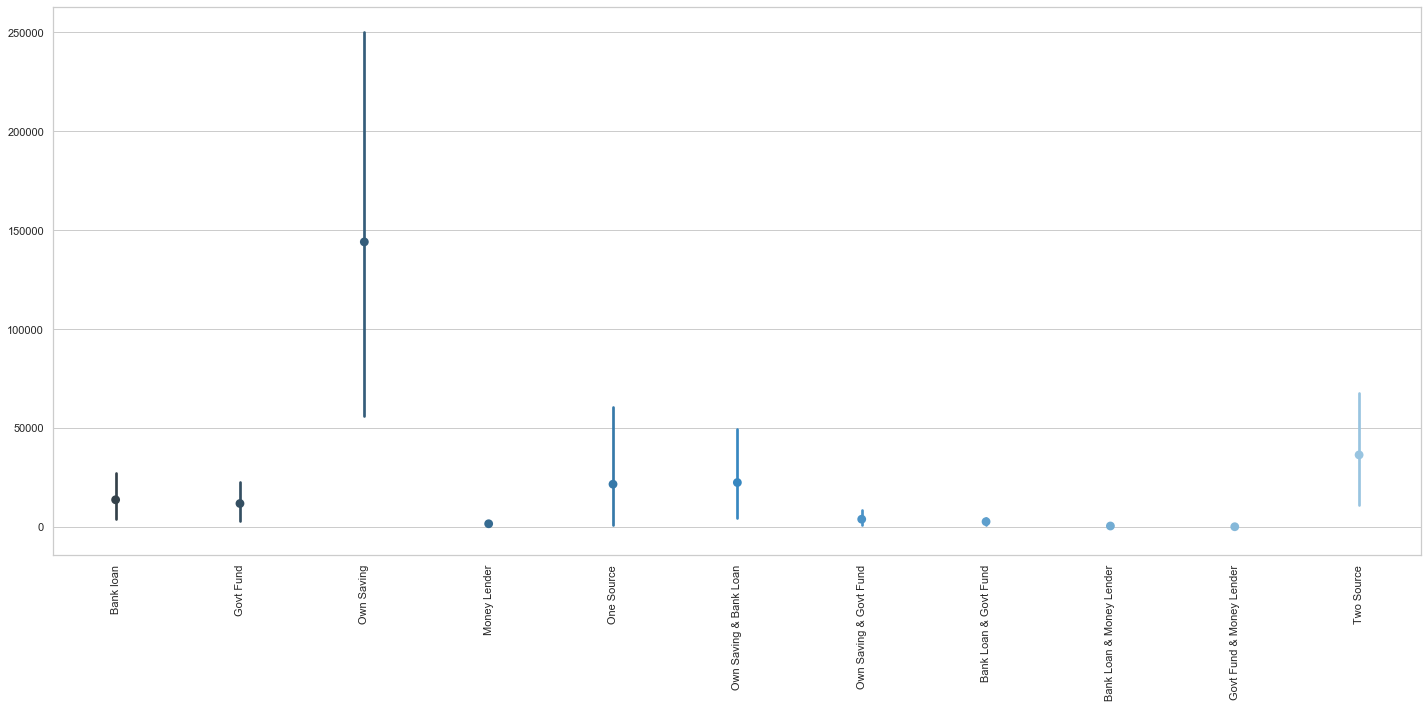

In [51]:
# categorical plot to observe the distribution of funding source data

fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=90)
sns.factorplot(data = dataf,palette=("Blues_d"),ax=ax)
plt.close(2)

# saving the plotted graph in plot directory
plt.tight_layout()
name = '/funding_classification_cat_'+level+'.png'
plt.savefig(plots+name)

In [52]:
data4['Own Savings'] = (dataf['Own Saving']/data4['Number']).astype(float)

In [53]:
data4

,Number,Cost,Average,Depth,color,Pumping Hours,Own Savings
State,,,,,,,
ANDAMAN & NICOBARS,1334,153967,0.049797,0.013882,k,0.006775,0.396552
ANDHRA PRADESH,212030,5389779,0.000000,0.095147,b,0.358287,0.542277
ASSAM,215,69963,0.165988,0.609923,r,0.211657,0.418605
BIHAR,22877,939043,0.008647,0.114603,b,1.000000,0.107663
CHHATISGARH,47611,2520993,0.015233,0.079264,k,0.508717,0.576085
GOA,4673,144647,0.003062,0.000557,b,0.000000,0.733362
GUJARAT,932267,153139654,0.076825,0.035731,r,0.245059,0.385143
HARYANA,28,4645,0.077726,0.411132,r,0.866952,0.000000
HIMACHAL PRADESH,664,111607,0.078937,0.186183,r,0.881971,0.341867


In [54]:
data4 = data4[np.isfinite(data4['Own Savings'])]

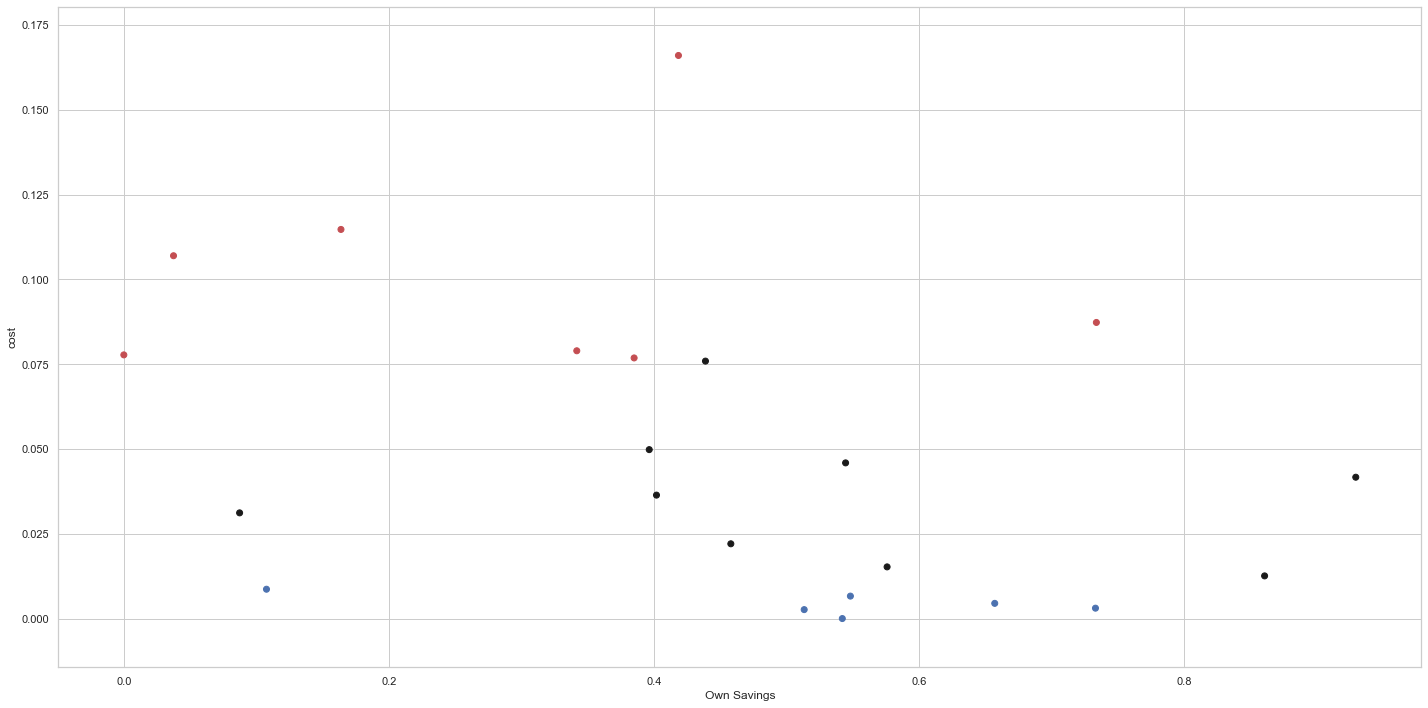

In [55]:
#scatter plot for the pumping hrs of dugwells at each level

plt.scatter(data4['Own Savings'],data4['Average'],color=data4['color'])
plt.ylabel('cost')
plt.xlabel('Own Savings')

# saving the plotted graph in plot directory

plt.tight_layout()
name = '/scatter_pumping_hrs_'+level+'.png'
plt.savefig(plots+name)

## Data for proportion of government funding for dugwells at each level - <font color=blue>*govt_fund*</font>

In [56]:
# reading the data for the number of dugwells in each source of funding at each level

data_1 = pd.read_csv(fund_govt)
dataf = data_1.groupby(level)['With one source of Finance - Bank loan','With one source of Finance - Govt. Fund','With one source of Finance - Own Saving','With one source of Finance - Money Lender','With one source of Finance - Others','With two Sources of finance - Own Saving & Bank Loan','With two Sources of finance - Own Saving & Govt Fund','With two Sources of finance - Own Saving & Money Lender','With two Sources of finance - Bank Loan & Govt Fund','With two Sources of finance - Bank Loan & Money Lender','With two Sources of finance - Govt Fund & Money Lender','With two Sources of finance - Others'].sum()

#calculating the proportion of the dugwells funded by the government at each level

dataf['Govt'] = dataf['With one source of Finance - Govt. Fund'] + dataf['With two Sources of finance - Own Saving & Govt Fund']+dataf['With two Sources of finance - Bank Loan & Govt Fund']+dataf['With two Sources of finance - Govt Fund & Money Lender']
dataf['Non-Govt'] = dataf['With one source of Finance - Bank loan'] + dataf['With one source of Finance - Own Saving']+dataf['With one source of Finance - Money Lender']+dataf['With one source of Finance - Others']+dataf['With two Sources of finance - Own Saving & Bank Loan']+dataf['With two Sources of finance - Own Saving & Money Lender']+dataf['With two Sources of finance - Bank Loan & Money Lender']+dataf['With two Sources of finance - Others']
dataf['Govt Fund Proportion'] = dataf['Govt']/(dataf['Govt']+dataf['Non-Govt'])
govt_fund = dataf
govt_fund

,With one source of Finance - Bank loan,With one source of Finance - Govt. Fund,With one source of Finance - Own Saving,With one source of Finance - Money Lender,With one source of Finance - Others,With two Sources of finance - Own Saving & Bank Loan,With two Sources of finance - Own Saving & Govt Fund,With two Sources of finance - Own Saving & Money Lender,With two Sources of finance - Bank Loan & Govt Fund,With two Sources of finance - Bank Loan & Money Lender,With two Sources of finance - Govt Fund & Money Lender,With two Sources of finance - Others,Govt,Non-Govt,Govt Fund Proportion
State,,,,,,,,,,,,,,,
ANDAMAN & NICOBARS,14,277,529,0,5,0,14,0,0,0,0,1,291,549,0.346429
ANDHRA PRADESH,1220,2070,114979,1450,567,6523,1921,30464,506,125,133,36128,4630,191456,0.023612
ASSAM,0,0,90,0,0,0,0,2,0,0,0,37,0,129,0.000000
BIHAR,1448,223,2463,6,40,504,447,523,1712,79,18,11417,2400,16480,0.127119
CHHATISGARH,616,1987,27428,7,598,4813,260,12,407,71,1,10161,2655,43706,0.057268
GOA,178,167,3427,12,453,6,13,0,1,0,0,10,181,4086,0.042419
GUJARAT,48409,14144,359056,4064,485029,51,12,2,529,44,2,10625,14687,907280,0.015930
HARYANA,0,0,0,0,0,0,0,0,0,0,0,9,0,9,0.000000
HIMACHAL PRADESH,24,12,227,0,19,52,31,0,12,1,0,121,55,444,0.110220


In [57]:
# merging the proportion of govt fund with main dataset

data4['Govt Fund Proportion'] = dataf['Govt Fund Proportion'].astype(float)
final_dataset = data4
final_dataset

,Number,Cost,Average,Depth,color,Pumping Hours,Own Savings,Govt Fund Proportion
State,,,,,,,,
ANDAMAN & NICOBARS,1334,153967,0.049797,0.013882,k,0.006775,0.396552,0.346429
ANDHRA PRADESH,212030,5389779,0.000000,0.095147,b,0.358287,0.542277,0.023612
ASSAM,215,69963,0.165988,0.609923,r,0.211657,0.418605,0.000000
BIHAR,22877,939043,0.008647,0.114603,b,1.000000,0.107663,0.127119
CHHATISGARH,47611,2520993,0.015233,0.079264,k,0.508717,0.576085,0.057268
GOA,4673,144647,0.003062,0.000557,b,0.000000,0.733362,0.042419
GUJARAT,932267,153139654,0.076825,0.035731,r,0.245059,0.385143,0.015930
HARYANA,28,4645,0.077726,0.411132,r,0.866952,0.000000,0.000000
HIMACHAL PRADESH,664,111607,0.078937,0.186183,r,0.881971,0.341867,0.110220


In [58]:
final_dataset = final_dataset[np.isfinite(final_dataset['Govt Fund Proportion'])]

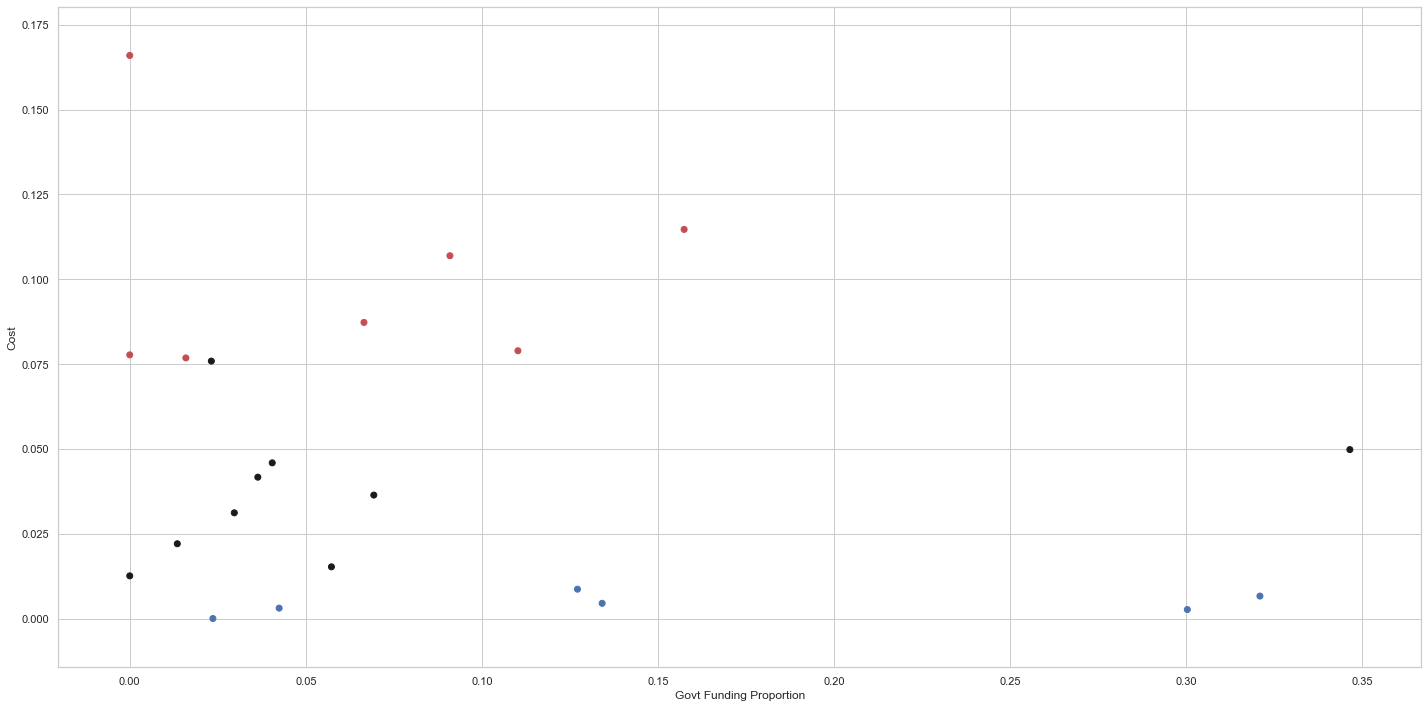

In [59]:
# scatter plot for the proportion of government funding

plt.scatter(final_dataset['Govt Fund Proportion'],final_dataset['Average'],color =final_dataset['color'])
plt.xlabel('Govt Funding Proportion')
plt.ylabel('Cost')

# saving the plotted graph in plot directory

plt.tight_layout()
name = '/scatter_govt_fund_'+level+'.png'
plt.savefig(plots+name)

## Removing the <font color=red>*Missing data Rows*</font>

In [60]:
final_dataset = final_dataset[np.isfinite(final_dataset['Number'])]
final_dataset = final_dataset[np.isfinite(final_dataset['Pumping Hours'])]
final_dataset = final_dataset[np.isfinite(final_dataset['Average'])]
final_dataset = final_dataset[np.isfinite(final_dataset['Depth'])]
final_dataset = final_dataset[np.isfinite(final_dataset['Own Savings'])]
final_dataset = final_dataset[np.isfinite(final_dataset['Govt Fund Proportion'])]

In [61]:
final_dataset = final_dataset.drop(['Cost'],axis = 1)
final_dataset

,Number,Average,Depth,color,Pumping Hours,Own Savings,Govt Fund Proportion
State,,,,,,,
ANDAMAN & NICOBARS,1334,0.049797,0.013882,k,0.006775,0.396552,0.346429
ANDHRA PRADESH,212030,0.000000,0.095147,b,0.358287,0.542277,0.023612
ASSAM,215,0.165988,0.609923,r,0.211657,0.418605,0.000000
BIHAR,22877,0.008647,0.114603,b,1.000000,0.107663,0.127119
CHHATISGARH,47611,0.015233,0.079264,k,0.508717,0.576085,0.057268
GOA,4673,0.003062,0.000557,b,0.000000,0.733362,0.042419
GUJARAT,932267,0.076825,0.035731,r,0.245059,0.385143,0.015930
HARYANA,28,0.077726,0.411132,r,0.866952,0.000000,0.000000
HIMACHAL PRADESH,664,0.078937,0.186183,r,0.881971,0.341867,0.110220


## <font color=red>Normalization</font> of the number of Dugwells

In [62]:
max_depth = final_dataset['Number'].max()
min_depth = final_dataset['Number'].min()
diff = max_depth - min_depth

In [63]:
final_dataset['Number'] = (final_dataset['Number']-min_depth)/diff

In [64]:
final_plot = final_dataset
final_plot = final_plot.drop(['Average'],axis=1)

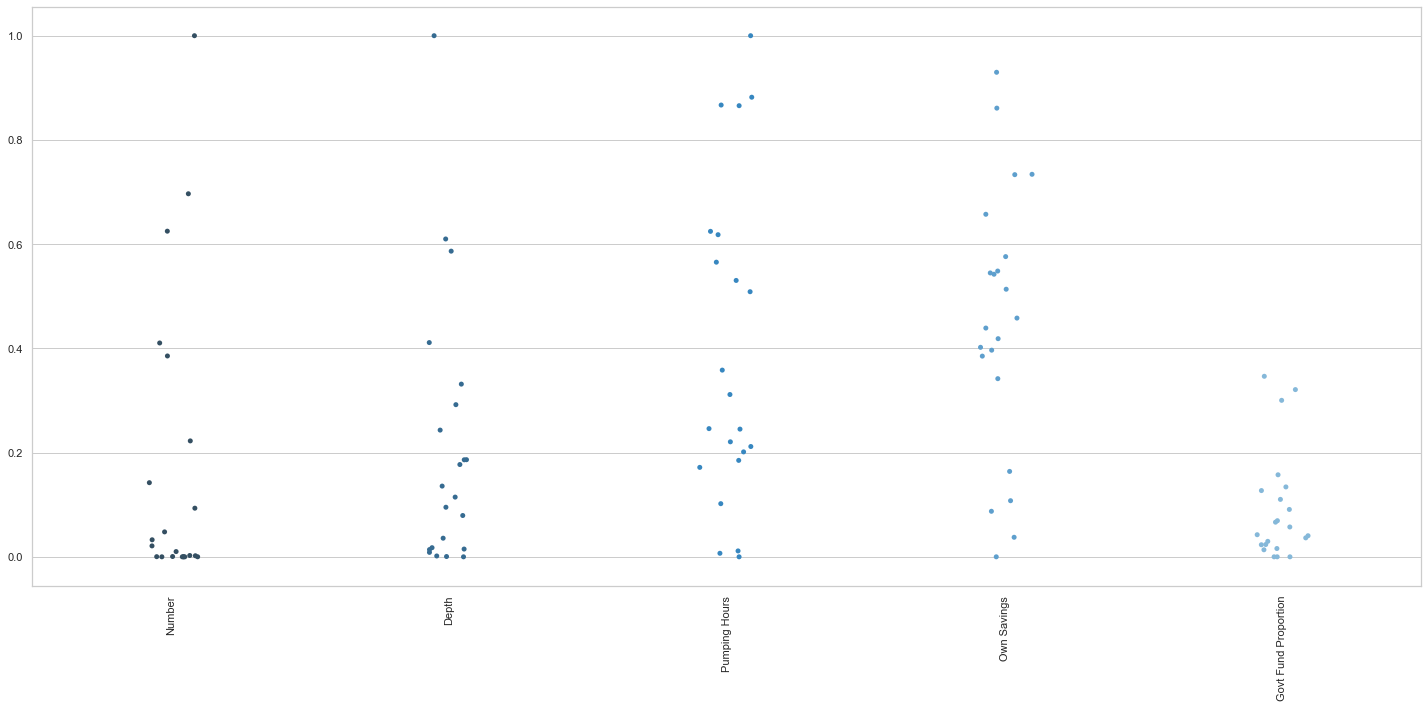

In [65]:
#final dataset

fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=90)
sns.catplot(data = final_plot,palette=("Blues_d"),ax=ax)
plt.close(2)

# saving the plotted graph in plot directory
plt.tight_layout()
name = '/final_classifiaction_cat_'+level+'.png'
plt.savefig(plots+name)

## Splitting Data for Testing Training

In [66]:
# ratio for the splitting of training and testing data
splitting_ratio= 0.8

In [67]:
val = np.random.rand(len(final_plot)) < splitting_ratio

train = final_plot[val]
test = final_plot[~val]

In [68]:
train.head()

,Number,Depth,color,Pumping Hours,Own Savings,Govt Fund Proportion
State,,,,,,
ANDAMAN & NICOBARS,0.000575,0.013882,k,0.006775,0.396552,0.346429
ANDHRA PRADESH,0.093321,0.095147,b,0.358287,0.542277,0.023612
BIHAR,0.010058,0.114603,b,1.000000,0.107663,0.127119
CHHATISGARH,0.020946,0.079264,k,0.508717,0.576085,0.057268
GOA,0.002045,0.000557,b,0.000000,0.733362,0.042419


In [103]:
train.to_csv(data_set+ '\ClassificationTrainactual.csv')

In [70]:
test.head()

,Number,Depth,color,Pumping Hours,Own Savings,Govt Fund Proportion
State,,,,,,
ASSAM,0.000082,0.609923,r,0.211657,0.418605,0.000000
GUJARAT,0.410362,0.035731,r,0.245059,0.385143,0.015930
WEST BENGAL,0.002521,0.243174,r,0.246000,0.163886,0.157404


In [102]:
test.to_csv(data_set+ '\ClassificationTestactual.csv')

In [72]:
nu_low = np.percentile(train.Number,30)
print(nu_low)
nu_high = np.percentile(train.Number,70)
print(nu_high)

0.00039793146070778965
0.12269160135719276


In [73]:
train2 = train
train2['Number of Dugwells'] = 'string'
test2 = test
test2['Number of Dugwells'] = 'string'

# Binning / Discretization

In [74]:
for i, row in train2.iterrows():
    if(float(row.Number)<nu_low):
        train2.at[i, 'Number of Dugwells'] = 'LOW'
    if(float(row.Number)>nu_high):
        train2.at[i, 'Number of Dugwells'] = 'HIGH'
    if(float(row.Number)>=nu_low and float(row.Number)<=nu_high):
        train2.at[i, 'Number of Dugwells'] = 'MEDIUM'
train3=train2.drop(['Number'],axis=1)

In [75]:
for i, row in test2.iterrows():
    if(float(row.Number)<nu_low):
        test2.at[i, 'Number of Dugwells'] = 'LOW'
    if(float(row.Number)>nu_high):
        test2.at[i, 'Number of Dugwells'] = 'HIGH'
    if(float(row.Number)>=nu_low and float(row.Number)<=nu_high):
        test2.at[i, 'Number of Dugwells'] = 'MEDIUM'
test3=test2.drop(['Number'],axis=1)

In [76]:
nu_low = np.percentile(train.Depth,30)
print(nu_low)
nu_high = np.percentile(train.Depth,70)
print(nu_high)
train3['Dugwells Depth'] = 'string'
test3['Dugwells Depth'] = 'string'

0.01594373693024868
0.18629662263419433


In [77]:
for i, row in train3.iterrows():
    if(float(row.Depth)<nu_low):
        train3.at[i, 'Dugwells Depth'] = 'LOW'
    if(float(row.Depth)>nu_high):
        train3.at[i, 'Dugwells Depth'] = 'HIGH'
    if(float(row.Depth)>=nu_low and float(row.Depth)<=nu_high):
        train3.at[i, 'Dugwells Depth'] = 'MEDIUM'
train4=train3.drop(['Depth'],axis=1)

In [78]:
for i, row in test3.iterrows():
    if(float(row.Depth)<nu_low):
        test3.at[i, 'Dugwells Depth'] = 'LOW'
    if(float(row.Depth)>nu_high):
        test3.at[i, 'Dugwells Depth'] = 'HIGH'
    if(float(row.Depth)>=nu_low and float(row.Depth)<=nu_high):
        test3.at[i, 'Dugwells Depth'] = 'MEDIUM'
test4=test3.drop(['Depth'],axis=1)

In [79]:
nu_low = np.percentile(train['Pumping Hours'],30)
print(nu_low)
nu_high = np.percentile(train['Pumping Hours'],70)
print(nu_high)
train4['Pump Hours'] = 'string'
test4['Pump Hours'] = 'string'

0.1915726835561769
0.5970515379632815


In [80]:
for i, row in train4.iterrows():
    if(float(row['Pumping Hours'])<nu_low):
        train4.at[i, 'Pump Hours'] = 'LOW'
    if(float(row['Pumping Hours'])>nu_high):
        train4.at[i, 'Pump Hours'] = 'HIGH'
    if(float(row['Pumping Hours'])>=nu_low and float(row['Pumping Hours'])<=nu_high):
        train4.at[i, 'Pump Hours'] = 'MEDIUM'
train5=train4.drop(['Pumping Hours'],axis=1)

In [81]:
for i, row in test4.iterrows():
    if(float(row['Pumping Hours'])<nu_low):
        test4.at[i, 'Pump Hours'] = 'LOW'
    if(float(row['Pumping Hours'])>nu_high):
        test4.at[i, 'Pump Hours'] = 'HIGH'
    if(float(row['Pumping Hours'])>=nu_low and float(row['Pumping Hours'])<=nu_high):
        test4.at[i, 'Pump Hours'] = 'MEDIUM'
test5=test4.drop(['Pumping Hours'],axis=1)

In [82]:
nu_low = np.percentile(train['Own Savings'],30)
print(nu_low)
nu_high = np.percentile(train['Own Savings'],70)
print(nu_high)
train5['own savings'] = 'string'
test5['own savings'] = 'string'

0.39874266379832496
0.5650060537650218


In [83]:
for i, row in train5.iterrows():
    if(float(row['Own Savings'])<nu_low):
        train5.at[i, 'own savings'] = 'LOW'
    if(float(row['Own Savings'])>nu_high):
        train5.at[i, 'own savings'] = 'HIGH'
    if(float(row['Own Savings'])>=nu_low and float(row['Own Savings'])<=nu_high):
        train5.at[i, 'own savings'] = 'MEDIUM'
train6=train5.drop(['Own Savings'],axis=1)

In [84]:
for i, row in test5.iterrows():
    if(float(row['Own Savings'])<nu_low):
        test5.at[i, 'own savings'] = 'LOW'
    if(float(row['Own Savings'])>nu_high):
        test5.at[i, 'own savings'] = 'HIGH'
    if(float(row['Own Savings'])>=nu_low and float(row['Own Savings'])<=nu_high):
        test5.at[i, 'own savings'] = 'MEDIUM'
test6=test5.drop(['Own Savings'],axis=1)

In [85]:
nu_low = np.percentile(train['Govt Fund Proportion'],30)
print(nu_low)
nu_high = np.percentile(train['Govt Fund Proportion'],70)
print(nu_high)
train6['Govt Fund'] = 'string'
test6['Govt Fund'] = 'string'

0.03235729786412357
0.10249590089269447


In [86]:
for i, row in train6.iterrows():
    if(float(row['Govt Fund Proportion'])<nu_low):
        train6.at[i, 'Govt Fund'] = 'LOW'
    if(float(row['Govt Fund Proportion'])>nu_high):
        train6.at[i, 'Govt Fund'] = 'HIGH'
    if(float(row['Govt Fund Proportion'])>=nu_low and float(row['Govt Fund Proportion'])<=nu_high):
        train6.at[i, 'Govt Fund'] = 'MEDIUM'
train7=train6.drop(['Govt Fund Proportion'],axis=1)

In [87]:
for i, row in test6.iterrows():
    if(float(row['Govt Fund Proportion'])<nu_low):
        test6.at[i, 'Govt Fund'] = 'LOW'
    if(float(row['Govt Fund Proportion'])>nu_high):
        test6.at[i, 'Govt Fund'] = 'HIGH'
    if(float(row['Govt Fund Proportion'])>=nu_low and float(row['Govt Fund Proportion'])<=nu_high):
        test6.at[i, 'Govt Fund'] = 'MEDIUM'
test7=test6.drop(['Govt Fund Proportion'],axis=1)

In [88]:
train7['Cost'] = 'string'
test7['Cost'] = 'string'

In [89]:
for i, row in train7.iterrows():
    if(row['color']=='b'):
        train7.at[i, 'Cost'] = 'LOW'
    if(row['color']=='r'):
        train7.at[i, 'Cost'] = 'HIGH'
    if(row['color']=='k'):
        train7.at[i, 'Cost'] = 'MEDIUM'
train8=train7.drop(['color'],axis=1)

In [90]:
for i, row in test7.iterrows():
    if(row['color']=='b'):
        test7.at[i, 'Cost'] = 'LOW'
    if(row['color']=='r'):
        test7.at[i, 'Cost'] = 'HIGH'
    if(row['color']=='k'):
        test7.at[i, 'Cost'] = 'MEDIUM'
test8=test7.drop(['color'],axis=1)

In [91]:
train8.head()

,Number of Dugwells,Dugwells Depth,Pump Hours,own savings,Govt Fund,Cost
State,,,,,,
ANDAMAN & NICOBARS,MEDIUM,LOW,LOW,LOW,HIGH,MEDIUM
ANDHRA PRADESH,MEDIUM,MEDIUM,MEDIUM,MEDIUM,LOW,LOW
BIHAR,MEDIUM,MEDIUM,HIGH,LOW,HIGH,LOW
CHHATISGARH,MEDIUM,MEDIUM,MEDIUM,HIGH,MEDIUM,MEDIUM
GOA,MEDIUM,LOW,LOW,HIGH,MEDIUM,LOW


In [92]:
test8.head()

,Number of Dugwells,Dugwells Depth,Pump Hours,own savings,Govt Fund,Cost
State,,,,,,
ASSAM,LOW,HIGH,MEDIUM,MEDIUM,LOW,HIGH
GUJARAT,HIGH,MEDIUM,MEDIUM,LOW,LOW,HIGH
WEST BENGAL,MEDIUM,HIGH,MEDIUM,LOW,HIGH,HIGH


In [101]:
train8.to_csv(data_set+'\ClassificationTrain.csv')

In [98]:
test8.to_csv(data_set+'\ClassificationTest.csv')

# To be continued....